In [26]:
from sklearn.datasets import make_regression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
#import and show CSV file
df = pd.read_csv('./CSV/group_data.csv')
df.head(5)

,Report Date,Group#,Group Zip,Medical Enroll Month/Day,Medical Enroll Year,Renewal Date,Term Date,Length (in months),Term Reason Code,Term Reason (numerical),...,Life Type,Vision,Vision Type,Sic Code,Waiting Period,Account Manager,Areas/Regions 1-19,EnrollmentDate,Medical Total # Deps (15-26),Status
0,3/1/2018,42772.0,92009.0,6/1/2018,2014.0,6/1/2017,5/31/2016,23,NP,1,...,NaN,NaN,NaN,8748.0,60.0,ASCHE,NaN,6/1/2014,NaN,TERMED
1,3/1/2018,42773.0,92270.0,6/1/2018,2014.0,6/1/2018,5/31/2017,35,NR,2,...,NaN,NaN,NaN,8093.0,30.0,NaN,NaN,6/1/2014,NaN,TERMED
2,3/1/2018,42774.0,90011.0,6/1/2018,2014.0,6/1/2018,NaN,52,NaN,3,...,NaN,NaN,NaN,3713.0,30.0,PLASC,NaN,6/1/2014,NaN,ACTIVE
3,3/1/2018,42775.0,91406.0,6/1/2018,2014.0,6/1/2015,12/31/2014,6,NP,1,...,NaN,NaN,NaN,1743.0,30.0,PLASC,NaN,6/1/2014,NaN,TERMED
4,3/1/2018,42777.0,91306.0,6/1/2018,2014.0,9/1/2018,8/31/2017,38,CH,4,...,NaN,NaN,NaN,8211.0,30.0,NaN,NaN,6/1/2014,NaN,TERMED


In [6]:
print (df.dtypes)

Report Date                                   object
Group#                                       float64
Group Zip                                    float64
Medical Enroll Month/Day                      object
Medical Enroll Year                          float64
Renewal Date                                  object
Term Date                                     object
Length (in months)                             int64
Term Reason Code                              object
Term Reason (numerical)                        int64
# of Employee                                  int64
# of Dependent                                 int64
Total # Deps (21-26)                           int64
RAF                                          float64
Total COBRA Members                            int64
Total Members                                  int64
Medical EE Count                               int64
Medical Dep Count                              int64
Medical COBRA Count                           

In [9]:
#clean up data to only show needed columns
clean_df = df.filter(['Group Zip','Current Renewal Rate Action', 'Length (in months)', 'Term Reason (numerical)','Medical Total Count','Sic Code'])
 

In [10]:
# Drop NaN
group_df = clean_df.dropna(how='any')
group_df.head(5)

,Group Zip,Current Renewal Rate Action,Length (in months),Term Reason (numerical),Medical Total Count,Sic Code
0,92009.0,7.0,23,1,0,8748.0
1,92270.0,0.4,35,2,0,8093.0
2,90011.0,17.6,52,3,36,3713.0
4,91306.0,9.3,38,4,0,8211.0
5,94401.0,10.9,52,3,1,8021.0


In [21]:
x = group_df[['Sic Code']]
y = group_df["Length (in months)"]
print(x.shape, y.shape)

(160712, 1) (160712,)


In [22]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [23]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
# Fit the model to the training data and calculate the scores for the training and testing data


model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0083561999829627e-06
Testing Score: -1.4152578317050413e-05


Text(0.5,1,'Residual Plot')

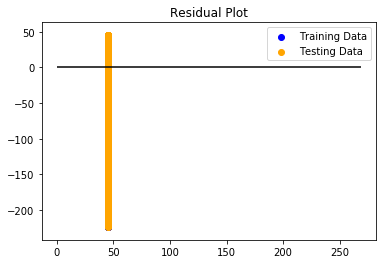

In [25]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")